In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import TwoLocal, UniformDistribution
from qiskit.quantum_info import Statevector
from qiskit_machine_learning.algorithms import NumPyDiscriminator, QGAN
from qiskit.aqua.operators.gradients import Gradient
from qiskit.aqua import *

In [13]:
bound = []
seed = 71
for i in range(16):
    bound.append([0., 1.])
bound = np.array(bound)
num_qbits = np.ones((16,), dtype=int)
batch_size = 1000
num_epochs = 100
print(sum(num_qbits))

16


In [14]:
def binary(x):
    if x == 0:
        return 0
    return 1

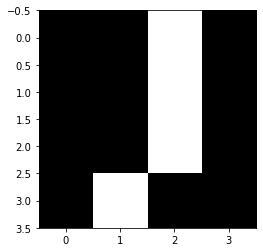

In [30]:
(real_X, real_Y), _ = mnist.load_data()
resized = []
filtred = []
for i in range(60000):
    if real_Y[i] == 1:
        filtred.append(real_X[i])
for n in range(5000):
    resized.append([])
    for i in range(4):
        for j in range(4):
            resized[n].append(binary(filtred[n][i*5 + 5][j*5 + 5]))
resized = np.array(resized)
plt.imshow(np.array(resized[32]).reshape(4,4), cmap='gray')

In [9]:
qgan = QGAN(resized, bound, num_qbits, batch_size, num_epochs, snapshot_dir='./')

KeyboardInterrupt: 

In [324]:
quantum_instance = QuantumInstance(backend=BasicAer.get_backend('statevector_simulator'),shots=10,
                                   seed_transpiler=seed, seed_simulator=seed)

In [325]:
ansatz = TwoLocal(int(np.sum(num_qbits)), 'ry', 'cz', entanglement='circular', reps=1)

In [326]:
init_dist = UniformDistribution(16)

<ipython-input-326-6e18a389f5bf>:1: DeprecationWarning: `UniformDistribution` is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. It moved to qiskit_finance.circuit.library.UniformDistribution.
  init_dist = UniformDistribution(16)


In [327]:
generator = ansatz.compose(init_dist, front = True)

In [328]:
print(generator)

      ┌───┐ ┌──────────┐      ┌───────────┐                          »
 q_0: ┤ H ├─┤ RY(θ[0]) ├─■──■─┤ RY(θ[16]) ├──────────────────────────»
      ├───┤ ├──────────┤ │  │ └───────────┘┌───────────┐             »
 q_1: ┤ H ├─┤ RY(θ[1]) ├─┼──■───────■──────┤ RY(θ[17]) ├─────────────»
      ├───┤ ├──────────┤ │          │      └───────────┘┌───────────┐»
 q_2: ┤ H ├─┤ RY(θ[2]) ├─┼──────────■────────────■──────┤ RY(θ[18]) ├»
      ├───┤ ├──────────┤ │                       │      └───────────┘»
 q_3: ┤ H ├─┤ RY(θ[3]) ├─┼───────────────────────■────────────■──────»
      ├───┤ ├──────────┤ │                                    │      »
 q_4: ┤ H ├─┤ RY(θ[4]) ├─┼────────────────────────────────────■──────»
      ├───┤ ├──────────┤ │                                           »
 q_5: ┤ H ├─┤ RY(θ[5]) ├─┼───────────────────────────────────────────»
      ├───┤ ├──────────┤ │                                           »
 q_6: ┤ H ├─┤ RY(θ[6]) ├─┼───────────────────────────────────────────»
      

In [329]:
init_params = np.random.rand(32)

In [330]:
qgan.set_generator(generator_circuit=generator, generator_init_params=init_params)

In [331]:
qgan.generator.optimizer.set_options(lr=0.005)

In [332]:
qgan._generator._free_parameters = sorted(generator.parameters, key=lambda p: p.name)
discriminator = NumPyDiscriminator(len(num_qbits))
qgan.set_discriminator(discriminator)

In [333]:
result = qgan.run(quantum_instance)

In [152]:
qgan.generator.generator_circuit.measure_all()

In [ ]:
#enter generator parameters below to run the generator(see the output.cvs)

In [155]:
from qiskit.circuit import Parameter

samp = execute(qgan.generator.generator_circuit, backend=backend, parameter_binds=[{qgan.generator.generator_circuit.parameters[i]: [ 0.06417828,  0.09175785,  0.58827114, -0.17156213,  0.05887562, -0.13388086,
  0.2602403,   1.12305652,  0.02346487, -0.21328849,  0.94425884, -0.08854179,
  0.86434704,  0.9300088,   0.93542944,  0.10256475,  0.88636679,  0.98512674,
  0.35813133,  0.340117,    0.6048655,   1.18874142,  0.08244926,  0.76949756,
  1.16278194,  0.58932069,  0.6379748,   0.18482973, -0.089858,   -0.22755808,
  0.26893212,  0.51582041][i] for i in range(32)}], shots=8192)

In [ ]:
#enter the sample to be sampled below

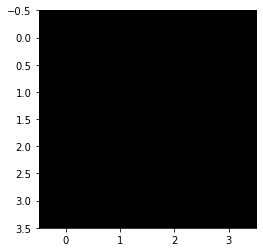

In [157]:
plt.imshow(np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]).reshape(4,4),cmap='gray')

In [106]:
qgan.generator.parameter_values

array([0.75756144, 0.95786947, 0.99864613, 0.18245381, 0.77164112,
       0.82313581, 0.47471644, 0.58984941, 0.32045968, 0.2576175 ,
       0.52475293, 0.3466008 , 0.80511794, 0.17551171, 0.53816665,
       0.4011906 , 0.50093188, 0.82756263, 0.35830814, 0.53123161,
       0.11105832, 0.10000138, 0.2283531 , 0.86659742, 0.32070056,
       0.8777781 , 0.33868214, 0.67448114, 0.93536478, 0.04485196,
       0.29145648, 0.12166456])

In [167]:
vals = list(samp.result().get_counts().values())

In [ ]:
#find the most probable samples

In [169]:
mx = 0
snd = 0
trd = 0
for i in range(len(vals)):
      if vals[i] > vals[mx]:
            trd = snd
            snd= mx
            mx = i

In [231]:
list(samp.result().get_counts().keys())[mx]

'1111010011111111'

In [ ]:
#you can check your discriminators output for a sample with the following code

In [232]:
a = np.array([[1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1]])

In [234]:
qgan.discriminator.get_label(a)

array([[0.81016019]])